In [1]:
%cd ..

/home/napulen/AugmentedNet-Copy


In [2]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
summary = "dataset/dataset_summary.tsv"
dfsummary = pd.read_csv(summary, sep="\t")

In [4]:
# training = dfsummary[dfsummary.split == "training"]

In [5]:
df = None
for nickname in dfsummary.file:
    split = dfsummary[dfsummary.file == nickname].split.to_list()[0]
    collection = dfsummary[dfsummary.file == nickname].collection.to_list()[0]
    tsvpath = os.path.join("dataset", split, f"{nickname}.tsv")
    print(split, tsvpath)
    dffile = pd.read_csv(tsvpath, sep="\t")
    dffile = dffile[dffile.a_harmonicRhythm == 0]
    dffile["a_isTonicization"] = dffile.a_localKey != dffile.a_tonicizedKey
    dffile["collection"] = collection
    dffile["split"] = split
    dffile["file"] = nickname
    if df is None:
        df = dffile
    else:
        df = pd.concat([df, dffile], ignore_index=True)

test dataset/test/bps-01-op002-no1-1.tsv
test dataset/test/bps-14-op027-no2-moonlight-1.tsv
test dataset/test/bps-23-op057-appassionata-1.tsv
test dataset/test/bps-15-op028-pastorale-1.tsv
test dataset/test/bps-10-op014-no2-1.tsv
test dataset/test/bps-25-op079-sonatina-1.tsv
test dataset/test/bps-07-op010-no3-1.tsv
test dataset/test/wirwtc-bach-wtc-i-3.tsv
test dataset/test/wirwtc-bach-wtc-i-8.tsv
test dataset/test/wirwtc-bach-wtc-i-12.tsv
test dataset/test/wirwtc-bach-wtc-i-15.tsv
test dataset/test/wirwtc-bach-wtc-i-22.tsv
test dataset/test/wirwtc-bach-wtc-i-24.tsv
test dataset/test/abc-op74-3.tsv
test dataset/test/abc-op127-2.tsv
test dataset/test/abc-op95-3.tsv
test dataset/test/abc-op18-no6-3.tsv
test dataset/test/abc-op59-no1-1.tsv
test dataset/test/abc-op18-no1-3.tsv
test dataset/test/abc-op135-2.tsv
test dataset/test/abc-op59-no2-3.tsv
test dataset/test/abc-op18-no1-1.tsv
test dataset/test/abc-op74-4.tsv
test dataset/test/tavern-beethoven-woo-77-a.tsv
test dataset/test/tavern-be

In [11]:
haydn = df[(df.collection == "haydnop20")]

In [18]:
measures = []
for f in haydn.file.unique():
    measures.append(haydn[(df.file == f)].s_measure.max())
print(measures, len(measures))
print(sum(measures))

[63.0, 104.0, 85.0, 95.0, 65.0, 162.0, 113.0, 100.0, 42.0, 109.0, 302.0, 36.0, 96.0, 79.0, 270.0, 161.0, 160.0, 84.0, 184.0, 87.0, 130.0, 106.0, 122.0, 166.0] 24
2921.0


/tmp/ipykernel_1553/2201667993.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  measures.append(haydn[(df.file == f)].s_measure.max())


localKey


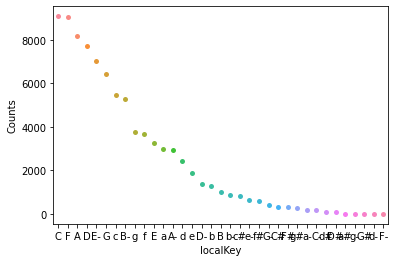

tonicizedKey


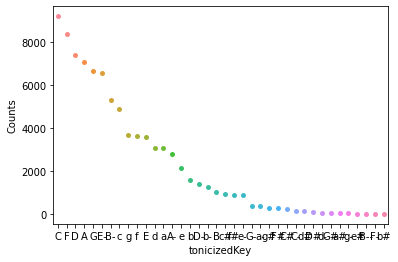

romanNumeral


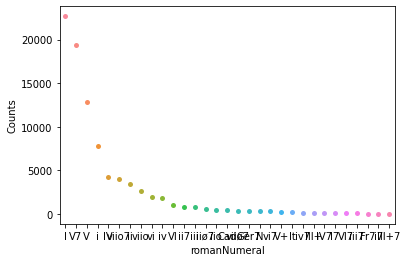

In [8]:
for feature in ["localKey", "tonicizedKey", "romanNumeral"]: #"Bass", "Tenor", "Alto", "Soprano", "Quality", "Root", "Key"]:
    print(feature)
    notecounts = df[f"a_{feature}"].value_counts().to_dict()
    dfbass = pd.DataFrame({feature: list(notecounts.keys()), "Counts": list(notecounts.values())})
    sns.swarmplot(y="Counts", x=feature, data=dfbass)
    plt.show()

isTonicization
bps
wirwtc
abc
tavern
haydnop20
wir


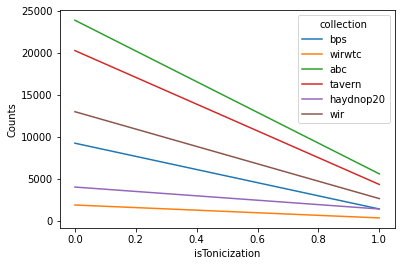

localKey
bps
wirwtc
abc
tavern
haydnop20
wir


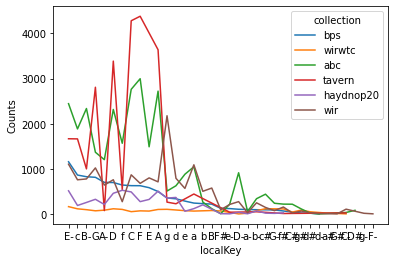

tonicizedKey
bps
wirwtc
abc
tavern
haydnop20
wir


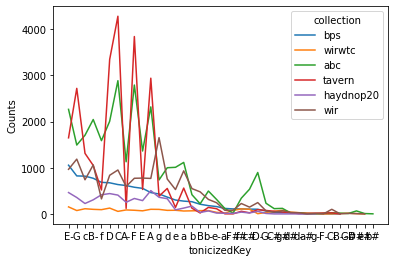

In [9]:
# key distribution
for feature in ["isTonicization", "localKey", "tonicizedKey"]:
    print(feature)
    dffeature = None
    for collection in df.collection.unique(): #"Bass", "Tenor", "Alto", "Soprano", "Quality", "Root", "Key"]:
        print(collection)
        dfcollection = df[df.collection == collection]
        notecounts = dfcollection[f"a_{feature}"].value_counts().to_dict()
        dffeat = pd.DataFrame({feature: list(notecounts.keys()), "Counts": list(notecounts.values()), "collection": collection})
        if dffeature is None:
            dffeature = dffeat
        else:
            dffeature = pd.concat([dffeature, dffeat], ignore_index=True)
    sns.lineplot(x=feature, y="Counts", hue="collection", data=dffeature)
    plt.show()

<AxesSubplot:xlabel='Roman numeral', ylabel='Counts'>

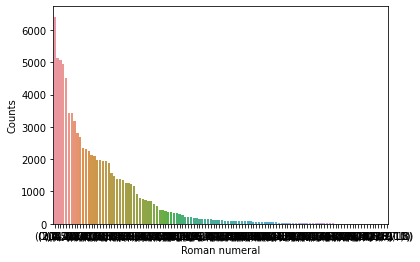

In [10]:
# pcsets
rncounts = df.a_pcset.value_counts().to_dict()
dfrn = pd.DataFrame({"Roman numeral": list(rncounts.keys()), "Counts": list(rncounts.values())})
sns.barplot(x="Roman numeral", y="Counts", data=dfrn)